## Table of Contents

1. [Analytics cases : Yammer](#1) 
2. [Investigating a drop in User Engagment](#2)   
    2.1 [The problem](#2.1)  
    2.2 [Possible causes](#2.2)  
    2.3 [Data](#2.3)  
    2.4 [Solving the case](#2.4)  
    2.5 [Summary](#2.5)
3. [Understanding the search functionality](#3)   
    3.1 [The problem](#3.1)  
    3.2 [Possible causes](#3.2)  
    3.3 [Data](#3.3)  
    3.4 [Solving the case](#3.4)  
    3.5 [Summary](#3.5)

### 1. Analytics cases: Yammer <a id="1"></a>
* Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. 
* Yammer is free to use indefinitely, but companies must pay license fees if they want access some exclusive services.
* Yammer has a centralized Analytics team whose primary goal is to drive better product and business decisions using data. 

### The cases

1. A Drop in Engagement
2. Understanding Search
3. A/B test

### 2. Investigating a drop in User Engagement <a id="2"></a>

### 2.1 The problem <a id="2.1"></a>
* When observing the user engagement over time, a drop is seen and analytics team has to analyse the reasons behind the drop and suggest appropriate measures.
* Yammer defines engagement as having made some type of server call by interacting with the product (shown in the data as events of type "engagement").
* The chart shows the number of users with atleast one engagement during the week.

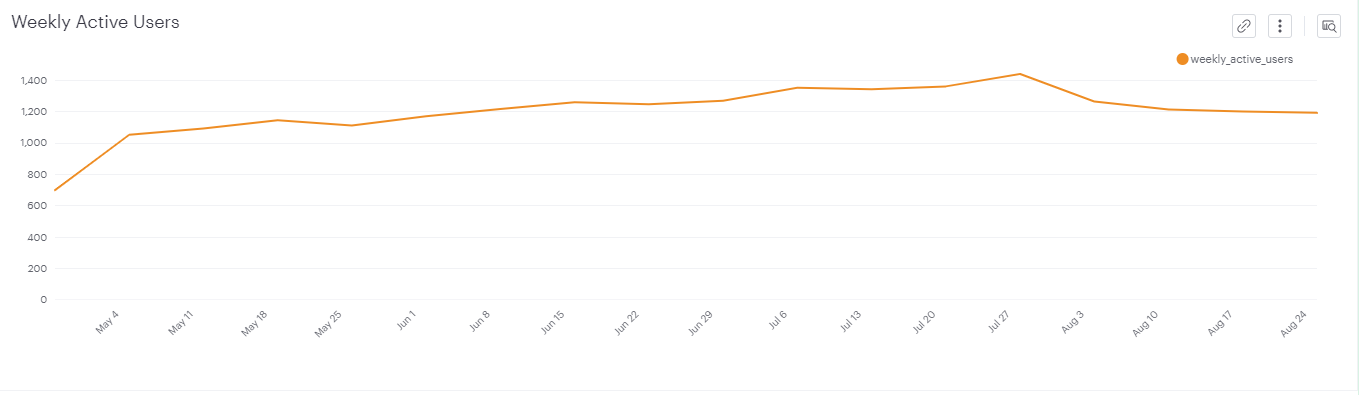

### 2.2 Possible causes <a id="2.2"></a>

* **Holiday**: People would not use Yammer on hoidays so if the user engagement is low in a particular country then it might be due to a holiday.
* **Broken feature**: It is possible that something in the application is broken, and therefore impossible for people to use. This could be limited to a process such as signup or a particular device type.
* **Broken tracking code**: It's possible that the code that logs events is, itself, broken. 
* **Traffic anomalies from bots**: Most major website see a lot of activity from bots. A change in the product or infrastructure that might make it harder for bots to interact with the site could decrease engagement.
* **Traffic shutdown to your site**: Internet service providers may have blocked the site.
* **Marketing event**: A Super Bowl ad, for example, might cause a massive spike in sign-ups for the product. 
* **Search crawler changes**: For a website that receives a lot of traffic, changes in the way search engines index them could cause big swings in traffic.

### 2.3 Data <a id="2.3"></a>

#### Table 1: Users

This table includes one row per user, with descriptive information about that user's account.

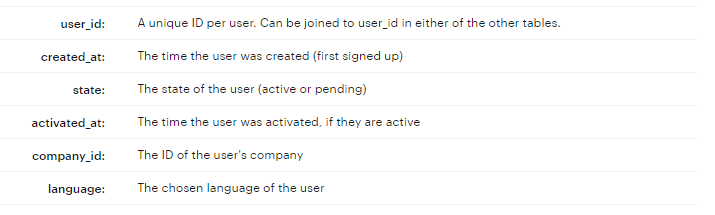

#### Table 2 : Events
This table includes one row per event, where an event is an action that a user has taken on Yammer. These events include login events, messaging events, search events, events logged as users progress through a signup funnel, events around received emails.

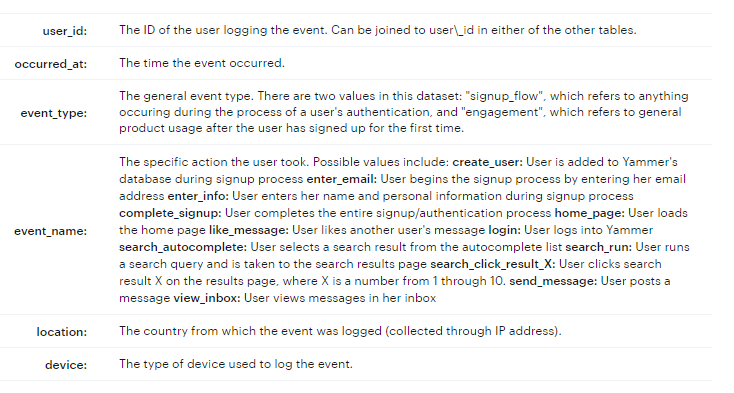

#### Table 3: Email Events
This table contains events specific to the sending of emails. It is similar in structure to the events table above.

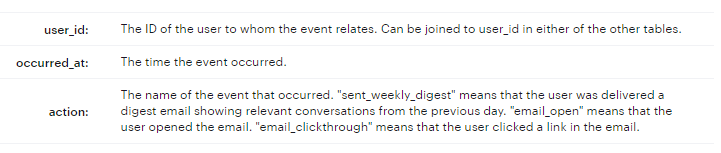

In [1]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
df1 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\users.csv")
df1.to_sql('users', engine)
df2 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\events.csv")
df2.to_sql('events', engine)
df3 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\emails.csv")
df3.to_sql('emails', engine)

### 2.4 Solving the case <a id="2.4"></a>

#### 2.4.1 Growth rate of customers - Activation rate 

**Objective:** To find if the growth of customers is normal or there has been a dip. If a dip has been observed, there might be broken feature in the site which is not allowing signups.

**Method:** First, using Date_Trunc function the data is grouped on the basis of day and the total number of users as well as the active users (users whose account is activated) is calculated and plotted.

In [3]:
"""SELECT DATE_TRUNC('day',created_at) AS day,
     COUNT(*) AS all_users,
     COUNT(CASE WHEN activated_at IS NOT NULL THEN u.user_id ELSE NULL END) AS activated_users
     FROM users u
     WHERE created_at >= '2014-06-01'
     AND created_at < '2014-09-01'
     GROUP BY 1
     ORDER BY 1
     LIMIT 10"""

"SELECT DATE_TRUNC('day',created_at) AS day,\n       COUNT(*) AS all_users,\n       COUNT(CASE WHEN activated_at IS NOT NULL THEN u.user_id ELSE NULL END) AS activated_users\n  FROM users u\n WHERE created_at >= '2014-06-01'\n   AND created_at < '2014-09-01'\n GROUP BY 1\n ORDER BY 1"

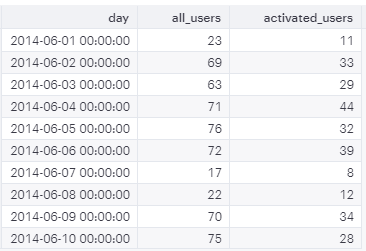

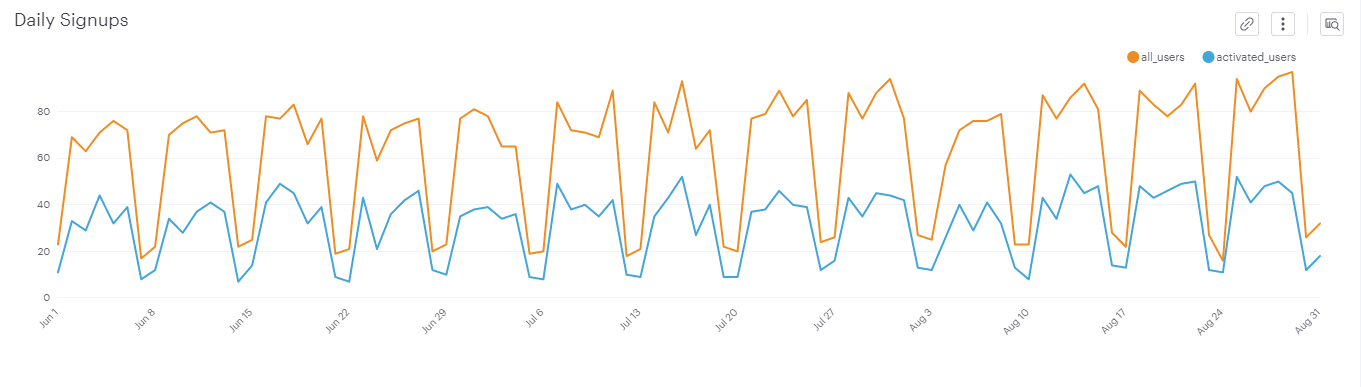

**CONCLUSION**  
The growth rate has remained the same, it is high during the week and low on weekends.

#### 2.4.2 Retention rate by user age

Since growth is normal, dip in engagement may be from existing users as opposed to new ones. One of the most effective ways to look at this is to cohort users based on when they signed up for the product. 

**Objective:** Check if the dip in engagment is mainly from new users or old users. If old users, then it has to be further investigated. If there is drop in new users, it is possible that people might have signed up and created accout due to some marketing event but have not used Yammer again.


**Method:** First, the age of each user at the event is calculated and the age of the user in general is computed. Age at event is interval between the event date and the date at which the account was activated. General age of the user is the interval between the day on which the analysis is carried out (1st September, 2014) and the day on which the account was activated. 

In the second step, for every week, the average age of the users at the event is calculated and the users are grouped on the basis of their age to find out how many users of different age groups are active at different weeks. 

In [ ]:
"""SELECT DATE_TRUNC('week',z.occurred_at) AS "week",
       AVG(z.age_at_event) AS "Average age during week",
       COUNT(DISTINCT CASE WHEN z.user_age > 70 THEN z.user_id ELSE NULL END) AS "10+ weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 70 AND z.user_age >= 63 THEN z.user_id ELSE NULL END) AS "9 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 63 AND z.user_age >= 56 THEN z.user_id ELSE NULL END) AS "8 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 56 AND z.user_age >= 49 THEN z.user_id ELSE NULL END) AS "7 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 49 AND z.user_age >= 42 THEN z.user_id ELSE NULL END) AS "6 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 42 AND z.user_age >= 35 THEN z.user_id ELSE NULL END) AS "5 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 35 AND z.user_age >= 28 THEN z.user_id ELSE NULL END) AS "4 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 28 AND z.user_age >= 21 THEN z.user_id ELSE NULL END) AS "3 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 21 AND z.user_age >= 14 THEN z.user_id ELSE NULL END) AS "2 weeks",
       COUNT(DISTINCT CASE WHEN z.user_age < 14 AND z.user_age >= 7 THEN z.user_id ELSE NULL END) AS "1 week",
       COUNT(DISTINCT CASE WHEN z.user_age < 7 THEN z.user_id ELSE NULL END) AS "Less than a week"
  FROM (
        SELECT e.occurred_at,
               u.user_id,
               DATE_TRUNC('week',u.activated_at) AS activation_week,
               EXTRACT('day' FROM e.occurred_at - u.activated_at) AS age_at_event,
               EXTRACT('day' FROM '2014-09-01'::TIMESTAMP - u.activated_at) AS user_age
          FROM tutorial.yammer_users u
          JOIN tutorial.yammer_events e
            ON e.user_id = u.user_id
           AND e.event_type = 'engagement'
           AND e.event_name = 'login'
           AND e.occurred_at >= '2014-05-01'
           AND e.occurred_at < '2014-09-01'
         WHERE u.activated_at IS NOT NULL
       ) z

 GROUP BY 1
 ORDER BY 1
LIMIT 10"""

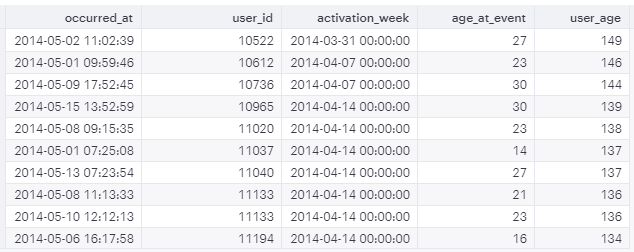

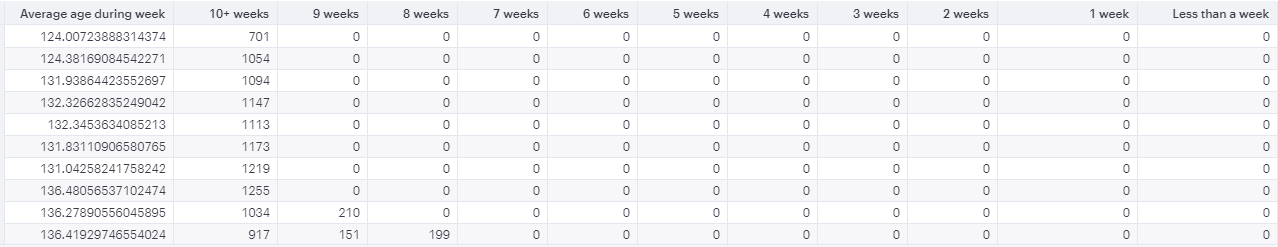

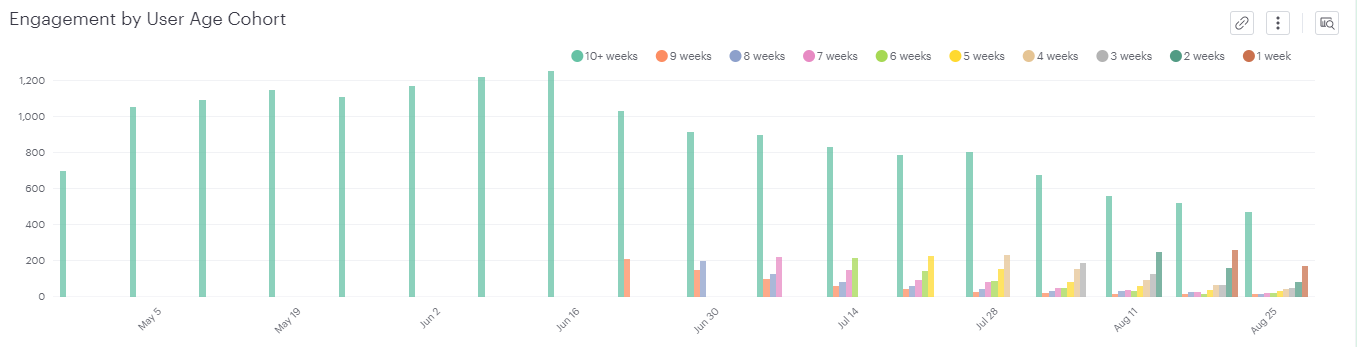

**CONCLUSION**   
This chart shows a decrease in engagement among users who signed up more than 10 weeks prior.

#### 2.4.3 Engagement rate by device type

**Objective:** Since there is a dip in old customers, it is better to check engagment across different device types which will help us to identify any problem that is limited to a specific device type.

**Method:** We have to find the unique customers at the beginning of each week in total as well as across different device types. First, date_trunc function is applied to find the date at the beginning of every week, data is grouped on the basis of this date and then using the COUNT function the distinct number of users are counted. Using Case statement, if the device type falls in the given list of values, then it is added to the count of users for that specific device type.

In [ ]:
"""SELECT DATE_TRUNC('week', occurred_at) AS week,
       COUNT(DISTINCT e.user_id) AS weekly_active_users,
       COUNT(DISTINCT CASE WHEN e.device IN ('macbook pro','lenovo thinkpad','macbook air','dell inspiron notebook',
          'asus chromebook','dell inspiron desktop','acer aspire notebook','hp pavilion desktop','acer aspire desktop','mac mini')
          THEN e.user_id ELSE NULL END) AS computer,
       COUNT(DISTINCT CASE WHEN e.device IN ('iphone 5','samsung galaxy s4','nexus 5','iphone 5s','iphone 4s','nokia lumia 635',
       'htc one','samsung galaxy note','amazon fire phone') THEN e.user_id ELSE NULL END) AS phone,
        COUNT(DISTINCT CASE WHEN e.device IN ('ipad air','nexus 7','ipad mini','nexus 10','kindle fire','windows surface',
        'samsumg galaxy tablet') THEN e.user_id ELSE NULL END) AS tablet
  FROM tutorial.yammer_events e
 WHERE e.event_type = 'engagement'
   AND e.event_name = 'login'
 GROUP BY 1
 ORDER BY 1
LIMIT 10"""

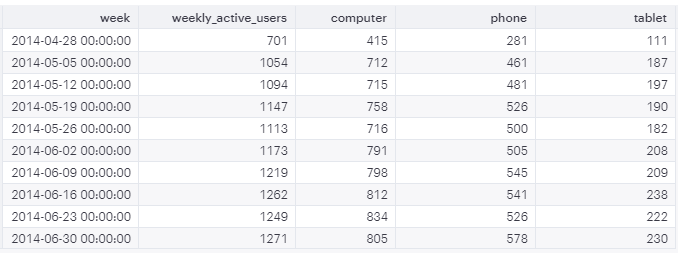

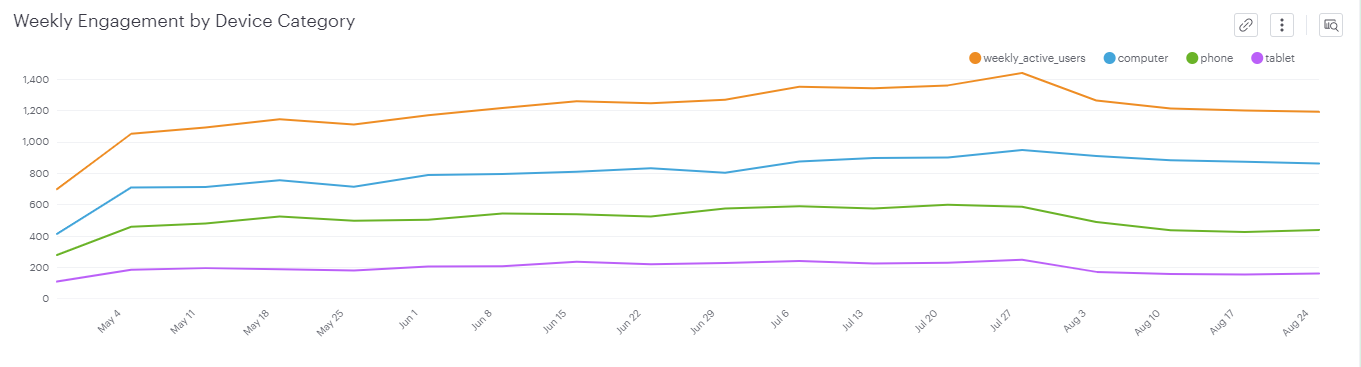

**CONCLUSION**  
There is a pretty steep drop in the number of active users on phones. There might be a problem with the mobile application that has led to  drop in user engagement mainly among the old users.

#### 2.4.4 Email Actions

**Objective:** To see how many users have been sent emails, how many have opened it and so on.

**Method:** Data is grouped on the basis of week and the frequency for different email actions like clickthrough, opening email, weekly digest is computed.

In [ ]:
"""SELECT DATE_TRUNC('week', occurred_at) AS week,
       COUNT(CASE WHEN e.action = 'sent_weekly_digest' THEN e.user_id ELSE NULL END) AS weekly_emails,
       COUNT(CASE WHEN e.action = 'sent_reengagement_email' THEN e.user_id ELSE NULL END) AS reengagement_emails,
       COUNT(CASE WHEN e.action = 'email_open' THEN e.user_id ELSE NULL END) AS email_opens,
       COUNT(CASE WHEN e.action = 'email_clickthrough' THEN e.user_id ELSE NULL END) AS email_clickthroughs
  FROM tutorial.yammer_emails e
 GROUP BY 1
 ORDER BY 1"""

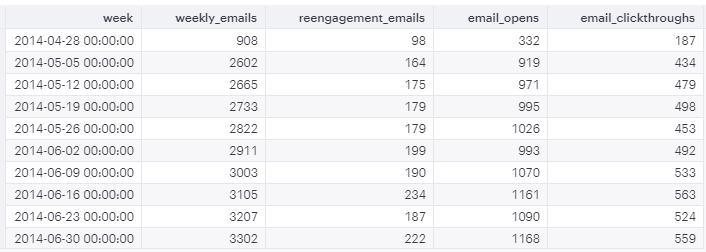

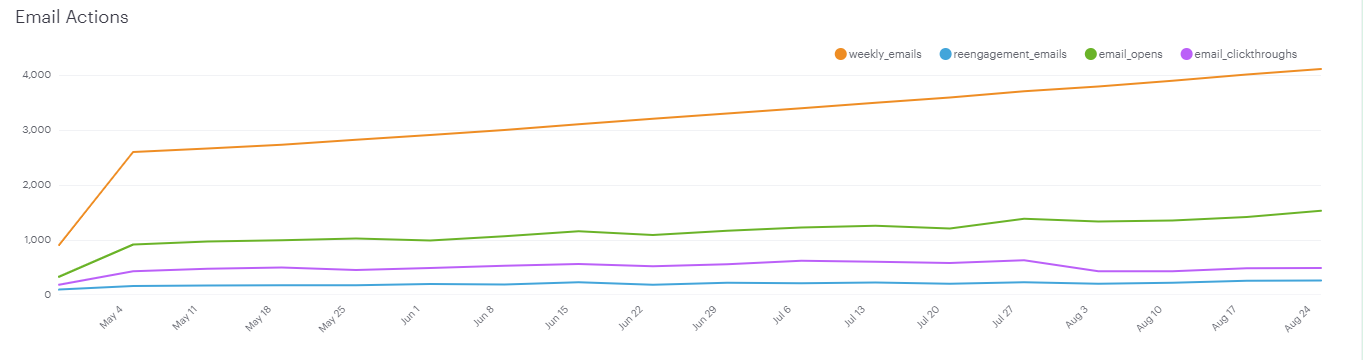

**CONCLUSION**  
There is a decrease in the email clickthroughs.

#### 2.4.5 Open and CTR of emails

**Objective:** To see how many users actually open the weekly digest mails and the reengagment mails.


**Subquery named a:**
First, data is grouped on the basis of week and the number of users who are sent weekly emails are counted in weekly_emails column.
Second, to count the number of mails that have been opened, the email table is joined to itself on the basis of user id such that if the action email_open has occurred within five minutes of the emeil being sent, it is counted in the weekly_opens column. This is done to make sure which email is being opened. There is no separate identifier for email so we dont know which email is being viewed by the user, all we know is that the user has viewed the mail so that is why, we define an interval such that if there is an event email_open within five minutes of the email being sent to the user, it is assumed that the particular email is viewed by the user. Also, a user may open the same email twice so specifying interval is critical.
Third, 

In [ ]:
"""SELECT week,
       weekly_opens/CASE WHEN weekly_emails = 0 THEN 1 ELSE weekly_emails END::FLOAT AS weekly_open_rate,
       weekly_ctr/CASE WHEN weekly_opens = 0 THEN 1 ELSE weekly_opens END::FLOAT AS weekly_ctr,
       retain_opens/CASE WHEN retain_emails = 0 THEN 1 ELSE retain_emails END::FLOAT AS retain_open_rate,
       retain_ctr/CASE WHEN retain_opens = 0 THEN 1 ELSE retain_opens END::FLOAT AS retain_ctr
  FROM (
SELECT DATE_TRUNC('week',e1.occurred_at) AS week,
       COUNT(CASE WHEN e1.action = 'sent_weekly_digest' THEN e1.user_id ELSE NULL END) AS weekly_emails,
       COUNT(CASE WHEN e1.action = 'sent_weekly_digest' THEN e2.user_id ELSE NULL END) AS weekly_opens,
       COUNT(CASE WHEN e1.action = 'sent_weekly_digest' THEN e3.user_id ELSE NULL END) AS weekly_ctr,
       COUNT(CASE WHEN e1.action = 'sent_reengagement_email' THEN e1.user_id ELSE NULL END) AS retain_emails,
       COUNT(CASE WHEN e1.action = 'sent_reengagement_email' THEN e2.user_id ELSE NULL END) AS retain_opens,
       COUNT(CASE WHEN e1.action = 'sent_reengagement_email' THEN e3.user_id ELSE NULL END) AS retain_ctr
  FROM tutorial.yammer_emails e1
  LEFT JOIN tutorial.yammer_emails e2
    ON e2.occurred_at >= e1.occurred_at
   AND e2.occurred_at < e1.occurred_at + INTERVAL '5 MINUTE'
   AND e2.user_id = e1.user_id
   AND e2.action = 'email_open'
  LEFT JOIN tutorial.yammer_emails e3
    ON e3.occurred_at >= e2.occurred_at
   AND e3.occurred_at < e2.occurred_at + INTERVAL '5 MINUTE'
   AND e3.user_id = e2.user_id
   AND e3.action = 'email_clickthrough'
 WHERE e1.occurred_at >= '2014-06-01'
   AND e1.occurred_at < '2014-09-01'
   AND e1.action IN ('sent_weekly_digest','sent_reengagement_email')
 GROUP BY 1
       ) a
 ORDER BY 1"""

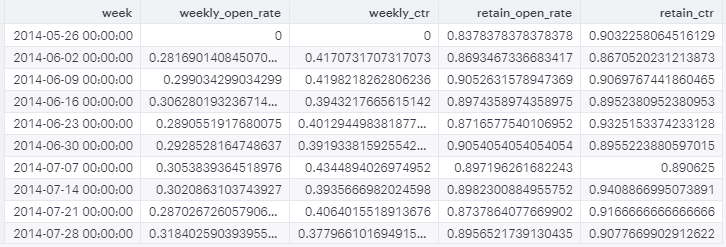

#### Subquery a


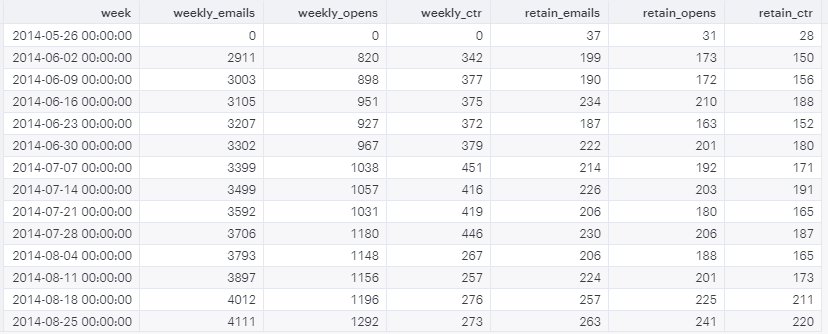

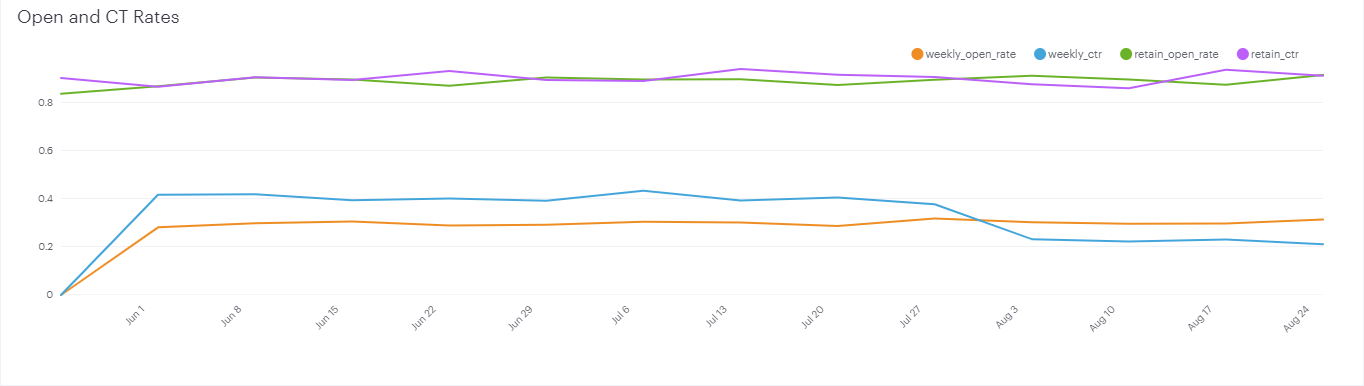

**CONCLUSION**  
The problem has to do with digest emails in addition to mobile apps. After investigation, it appears that the problem has to do with mobile use and digest emails. 

### 2.5 Summary <a id="2.5"></a>

* The growth rate has remained the same, it is high during the week and low on weekends.
* There is a decrease in engagement among users who signed up more than 10 weeks prior.
* There is a pretty steep drop in the number of active users on phones. There might be a problem with the mobile application that has led to  drop in user engagement mainly among the old users.
* There is a decrease in the email clickthroughs.
* The problem has to do with digest emails in addition to mobile apps. After investigation, it appears that the problem has to do with mobile use and digest emails. 

### 3. Understanding Search Functionality <a id="3"></a>

There is a search box in the header the persists on every page of the website. It prompts users to search for people, groups, and conversations.

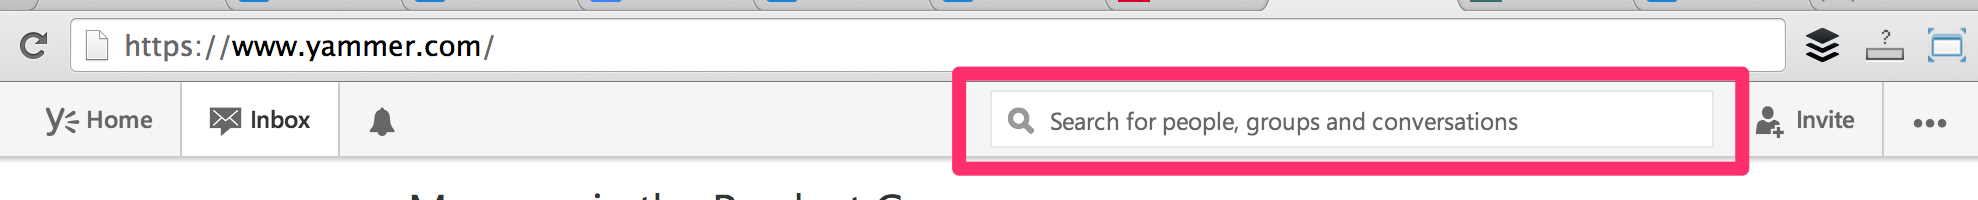

When a user begins to type in the search box, a dropdown list with the most relevant results appears. The results are separated by category (people, conversations, files, etc.). There is also an option to view all results.

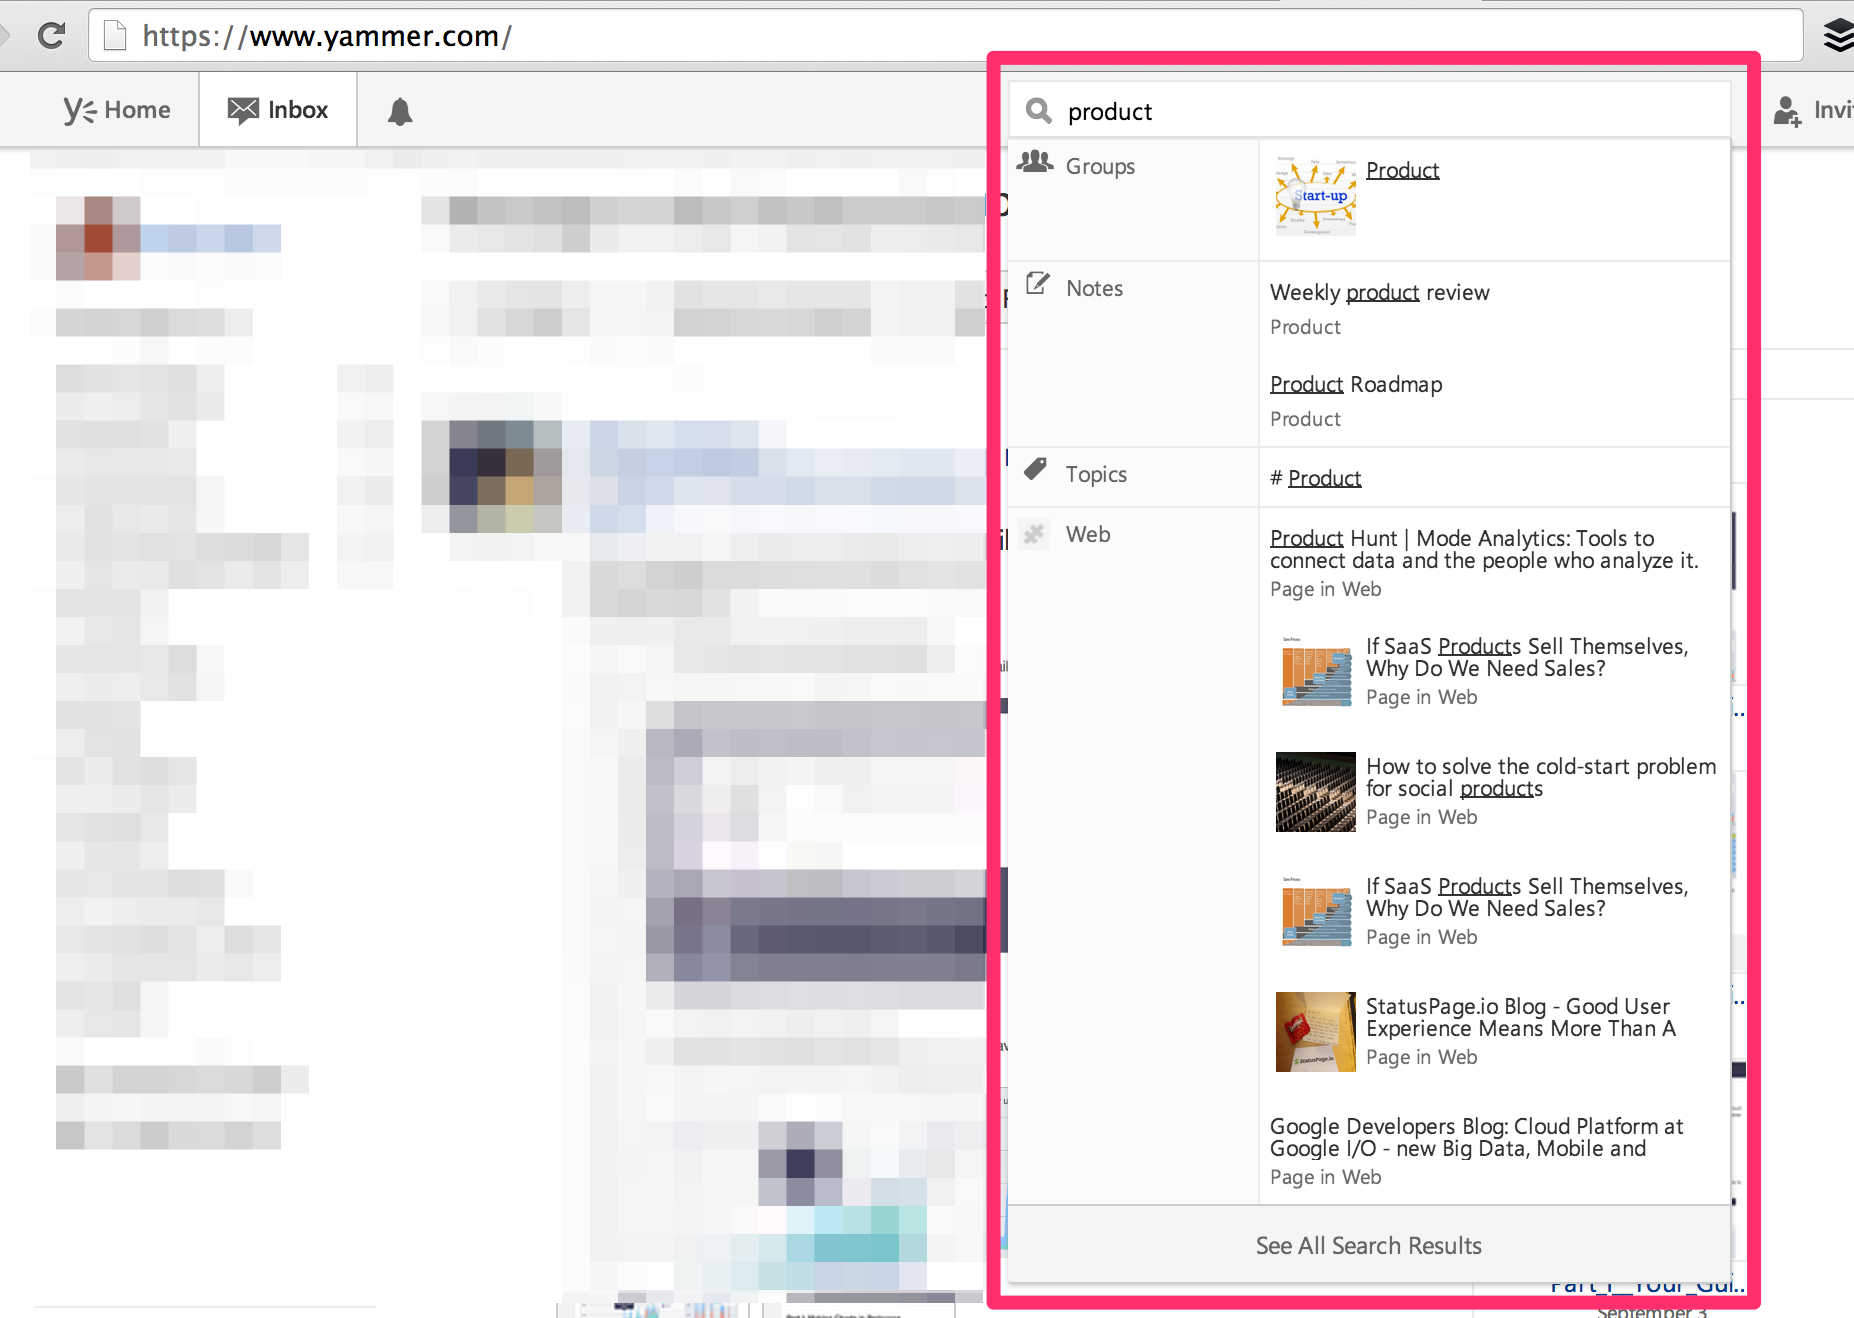

When the user hits enter or selects “view all results” from the dropdown, she is taken to a results page, with results separated by tabs for different categories (people, conversations, etc.). Each tab is order by relevance and chronology (more recent posts surface higher).


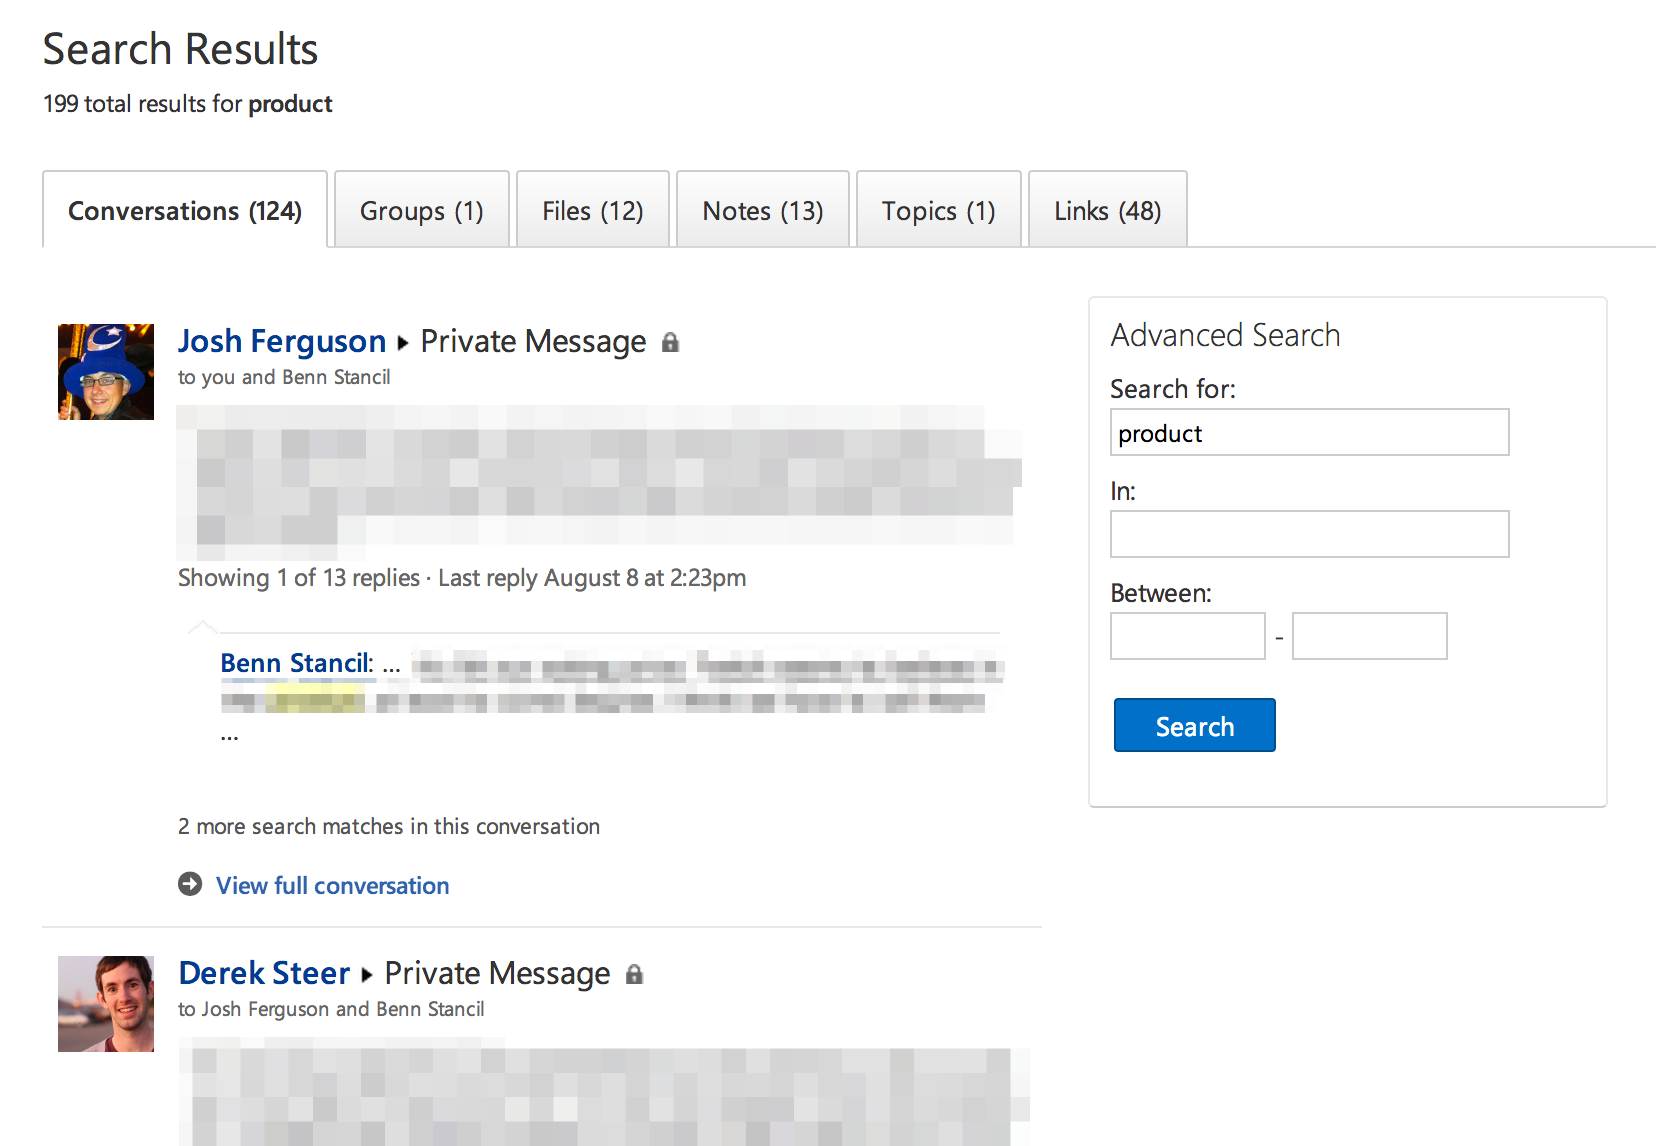

The search results page also has an “advanced search” box that allows the user to search again within a specific Yammer group or date range.

### 3.1 The problem <a id="3.1"></a>

The product team wants to develop efficiency of the search bar but forst evaluate if its worth the time. 

### 3.2 Possible causes <a id="3.2"></a>

* **Search use:** The first thing to understand is whether anyone even uses search at all

* **Search frequency:** Higher the search frequency, the more it is used 

* **Clickthroughs:** If a user clicks many links in the search results, maybe he/she is not having a good experience. However, the inverse is not necessarily true—clicking only one result does not imply a success. Clickthroughs are very useful in determining whether search rankings are good. If users frequently click low results or scroll to additional pages, then the ranking algorithm should be adjusted.

* **Autocomplete Clickthroughs:** How many searches are done using autocomplete? It would tell us how efficient is the search.

### 3.3 Data <a id="3.3"></a>

There are two tables which will be used here : users table and events table. It is not only important to evaluate the search frequency but also to see how many times a user searches within a short span of time. This might imply that the user is not satisfied with the search results, thus session is defined. A session is defined as a string of events logged by a user without a 10-minute break between any two events. So if a user goes 10 minutes without logging an event, the session is ended and her next engagement will be considered a new session.

### 3.4 Solving the case <a id="3.4"></a>

#### 3.4.1 Frequency of Search Runs and Search Autocompletes

**Objective:** To find the number of **sessions** in which search run and autocomplete is used.

**Method:** First we have to define a session and organise the data session wise.

#### Bounds subquery
A table bounds is created which has columns last_event and next_event, it shows the amount of time that has lapsed since the last event and the time to the next event. This is done for every user_id and ordered by occurred_at. Another column id is also added which is just numbering of the rows (this will later be used to define session number).
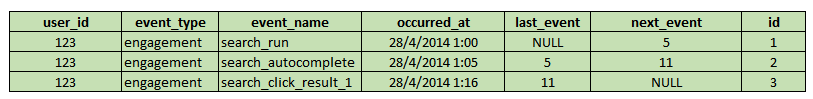

#### Final subquery
For those events where the time from the event is less than 10 minutes, the id column is replaced by the id in the preceding row because both the events are in the same session. 
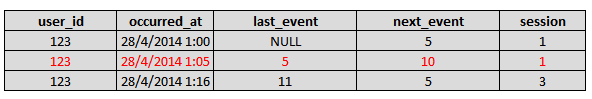

#### Session subquery
Now after obtaining the session id's, data is grouped on the basis of user id and session id to get the session start and session end time.
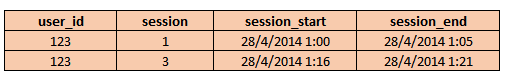

#### x subquery 
The session id, session start and session end time is joined to the event's table so that for each event, we get the session start and end time.
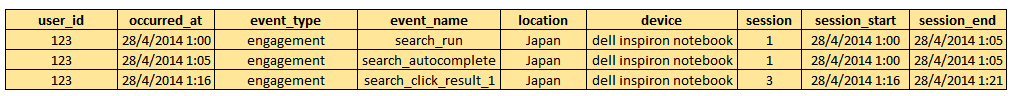

#### z subquery
Events are grouped on the basis of session number, session start_time and user_id. Further, the number of searches, search with autocompletes and search runs for each user id in each session is computed.
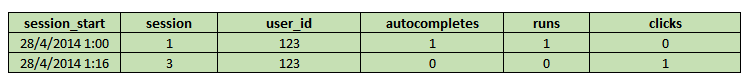

#### Final output

For each week, the percentage of sessions with autocomplete and percentage of sessions with runs is calculated.
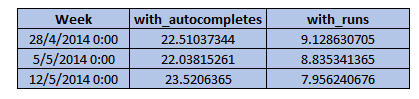

In [ ]:
"""SELECT DATE_TRUNC('week',z.session_start) AS week, 
       COUNT(CASE WHEN z.autocompletes > 0 THEN z.session ELSE NULL END)/COUNT(*)::FLOAT AS with_autocompletes,
       COUNT(CASE WHEN z.runs > 0 THEN z.session ELSE NULL END)/COUNT(*)::FLOAT AS with_runs
  FROM (
SELECT x.session_start,
       x.session,
       x.user_id,
       COUNT(CASE WHEN x.event_name = 'search_autocomplete' THEN x.user_id ELSE NULL END) AS autocompletes,
       COUNT(CASE WHEN x.event_name = 'search_run' THEN x.user_id ELSE NULL END) AS runs,
       COUNT(CASE WHEN x.event_name LIKE 'search_click_%' THEN x.user_id ELSE NULL END) AS clicks
  FROM (
SELECT e.*,
       session.session,
       session.session_start
  FROM tutorial.yammer_events e
  LEFT JOIN (
       SELECT user_id,
              session,
              MIN(occurred_at) AS session_start,
              MAX(occurred_at) AS session_end
         FROM (
              SELECT bounds.*,
              		    CASE WHEN last_event >= INTERVAL '10 MINUTE' THEN id
              		         WHEN last_event IS NULL THEN id
              		         ELSE LAG(id,1) OVER (PARTITION BY user_id ORDER BY occurred_at) END AS session
                FROM (
                     SELECT user_id,
                            event_type,
                            event_name,
                            occurred_at,
                            occurred_at - LAG(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) AS last_event,
                            LEAD(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) - occurred_at AS next_event,
                            ROW_NUMBER() OVER () AS id
                       FROM tutorial.yammer_events e
                      WHERE e.event_type = 'engagement'
                      ORDER BY user_id,occurred_at
                     ) bounds
               WHERE last_event >= INTERVAL '10 MINUTE'
                  OR next_event >= INTERVAL '10 MINUTE'
               	 OR last_event IS NULL
              	 	 OR next_event IS NULL   
              ) final
        GROUP BY 1,2
       ) session
    ON e.user_id = session.user_id
   AND e.occurred_at >= session.session_start
   AND e.occurred_at <= session.session_end
 WHERE e.event_type = 'engagement'
       ) x
 GROUP BY 1,2,3
       ) z
 GROUP BY 1
 ORDER BY 1"""

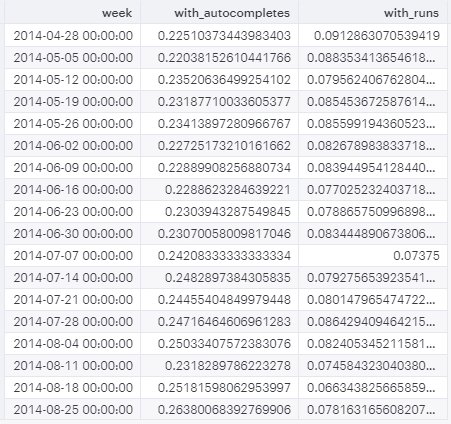

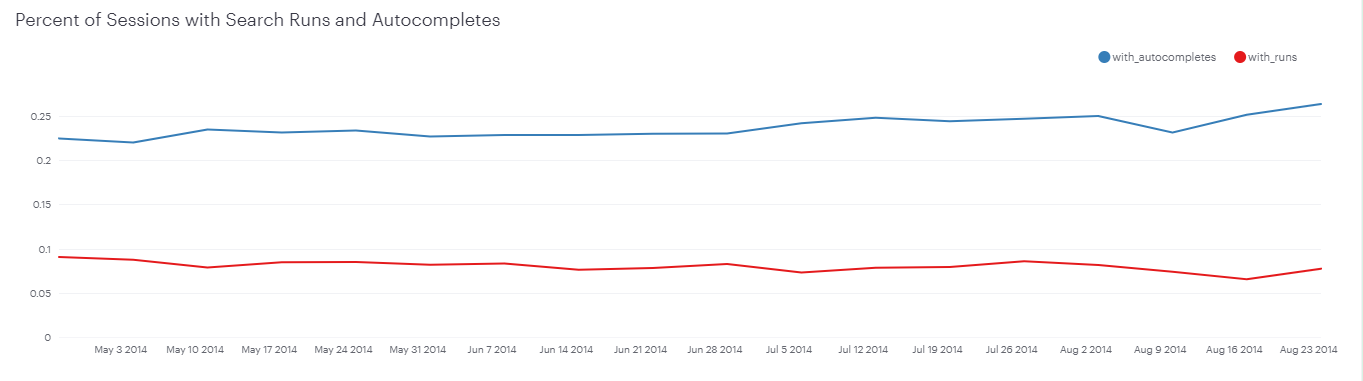

**CONCLUSION**  
Autocomplete is used more frequently by the users.

#### 3.4.2 Number of sessions with autocompletes

**Objective:** To calculate the number of sessions where autocomplete is used for a given number of times.

**Method:** The previous code, computes the number of times autocomplete is used in a given session. In the z subquery, we calculate the number of autocompletes done in each session so in the final table, for a given number of autocompletes, we calculate the number of sessions with that specific number of autocompletes. For example, if the number of autocompletes in a session are 2, then in the final output of the code, we would calculate the total number of sessions with 2 autocompletes.

In [ ]:
"""SELECT autocompletes,
       COUNT(*) AS sessions
  FROM (
SELECT x.session_start,
       x.session,
       x.user_id,
       COUNT(CASE WHEN x.event_name = 'search_autocomplete' THEN x.user_id ELSE NULL END) AS autocompletes,
       COUNT(CASE WHEN x.event_name = 'search_run' THEN x.user_id ELSE NULL END) AS runs,
       COUNT(CASE WHEN x.event_name LIKE 'search_click_%' THEN x.user_id ELSE NULL END) AS clicks
  FROM (
SELECT e.*,
       session.session,
       session.session_start
  FROM tutorial.yammer_events e
  LEFT JOIN (
       SELECT user_id,
              session,
              MIN(occurred_at) AS session_start,
              MAX(occurred_at) AS session_end
         FROM (
              SELECT bounds.*,
              		    CASE WHEN last_event >= INTERVAL '10 MINUTE' THEN id
              		         WHEN last_event IS NULL THEN id
              		         ELSE LAG(id,1) OVER (PARTITION BY user_id ORDER BY occurred_at) END AS session
                FROM (
                     SELECT user_id,
                            event_type,
                            event_name,
                            occurred_at,
                            occurred_at - LAG(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) AS last_event,
                            LEAD(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) - occurred_at AS next_event,
                            ROW_NUMBER() OVER () AS id
                       FROM tutorial.yammer_events e
                      WHERE e.event_type = 'engagement'
                      ORDER BY user_id,occurred_at
                     ) bounds
               WHERE last_event >= INTERVAL '10 MINUTE'
                  OR next_event >= INTERVAL '10 MINUTE'
               	 OR last_event IS NULL
              	 	 OR next_event IS NULL   
              ) final
        GROUP BY 1,2
       ) session
    ON e.user_id = session.user_id
   AND e.occurred_at >= session.session_start
   AND e.occurred_at <= session.session_end
 WHERE e.event_type = 'engagement'
       ) x
 GROUP BY 1,2,3
       ) z
 WHERE autocompletes > 0
 GROUP BY 1
 ORDER BY 1"""

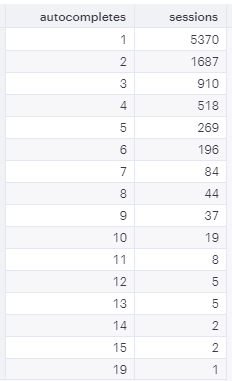

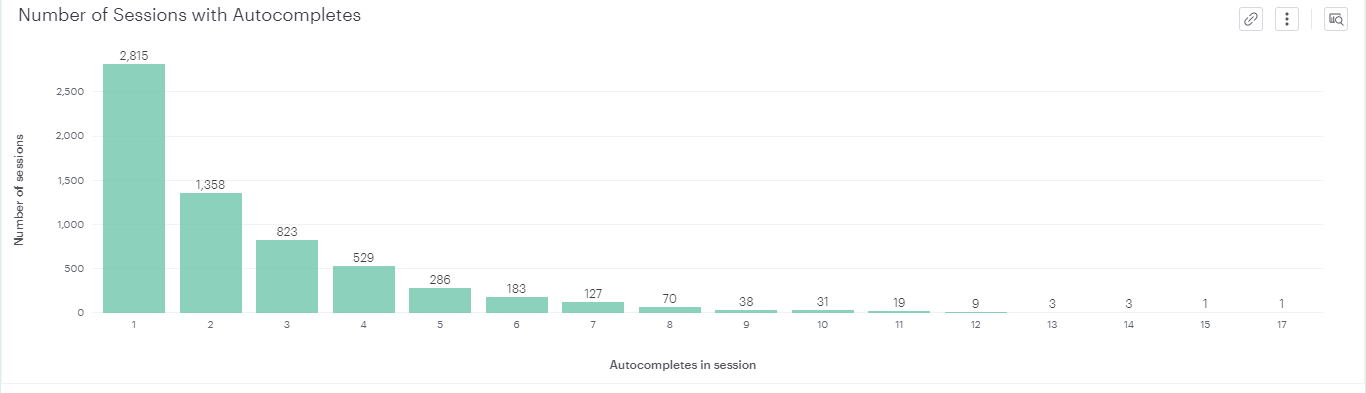

**CONCLUSION**  
Autocomplete is typically used once or twice per session.

### 3.4.3 Number of sessions with runs

**Objective:** To calculate the number of sessions where search run is used for a given number of times.

**Method:** In the z subquery, we calculate the number of search rune done in each session so in the final table, for a given number of search runs, we calculate the number of sessions with that specific number of search runs. 

In [ ]:
"""SELECT runs,
       COUNT(*) AS sessions
  FROM (
SELECT x.session_start,
       x.session,
       x.user_id,
       COUNT(CASE WHEN x.event_name = 'search_autocomplete' THEN x.user_id ELSE NULL END) AS autocompletes,
       COUNT(CASE WHEN x.event_name = 'search_run' THEN x.user_id ELSE NULL END) AS runs,
       COUNT(CASE WHEN x.event_name LIKE 'search_click_%' THEN x.user_id ELSE NULL END) AS clicks
  FROM (
SELECT e.*,
       session.session,
       session.session_start
  FROM tutorial.yammer_events e
  LEFT JOIN (
       SELECT user_id,
              session,
              MIN(occurred_at) AS session_start,
              MAX(occurred_at) AS session_end
         FROM (
              SELECT bounds.*,
              		    CASE WHEN last_event >= INTERVAL '10 MINUTE' THEN id
              		         WHEN last_event IS NULL THEN id
              		         ELSE LAG(id,1) OVER (PARTITION BY user_id ORDER BY occurred_at) END AS session
                FROM (
                     SELECT user_id,
                            event_type,
                            event_name,
                            occurred_at,
                            occurred_at - LAG(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) AS last_event,
                            LEAD(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) - occurred_at AS next_event,
                            ROW_NUMBER() OVER () AS id
                       FROM tutorial.yammer_events e
                      WHERE e.event_type = 'engagement'
                      ORDER BY user_id,occurred_at
                     ) bounds
               WHERE last_event >= INTERVAL '10 MINUTE'
                  OR next_event >= INTERVAL '10 MINUTE'
               	 OR last_event IS NULL
              	 	 OR next_event IS NULL   
              ) final
        GROUP BY 1,2
       ) session
    ON e.user_id = session.user_id
   AND e.occurred_at >= session.session_start
   AND e.occurred_at <= session.session_end
 WHERE e.event_type = 'engagement'
       ) x
 GROUP BY 1,2,3
       ) z
 WHERE runs > 0
 GROUP BY 1
 ORDER BY 1"""

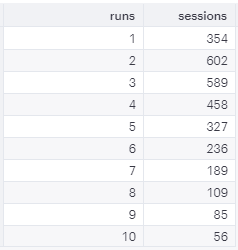

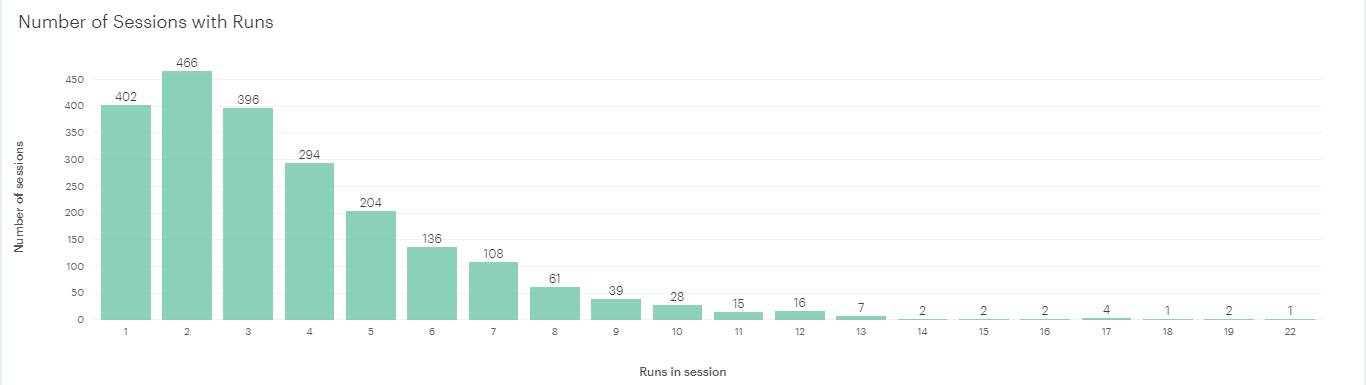

**CONCLUSION**  
When users do run full searches, they typically run multiple searches in a single session.

#### 3.4.4 Number of times user clicks on the search results

**Objective:** To check if the search results is actually what the user is looki for. If the user clicks on one or more results, it might imply that the user found what he/she is searching for. If the user clicks multiple search results, it might be an indication that search results do not serve the purpose.

**Method:** A user may click multiple results in a given search run. First, data is filtered for those sessions where a search is done and then the number of clicks per session is calculated. For a given number of clicks per session, the number of sessions with those many number of clicks is compluted and plotted.

In [ ]:
"""SELECT clicks,
       COUNT(*) AS sessions
  FROM (
SELECT x.session_start,
       x.session,
       x.user_id,
       COUNT(CASE WHEN x.event_name = 'search_autocomplete' THEN x.user_id ELSE NULL END) AS autocompletes,
       COUNT(CASE WHEN x.event_name = 'search_run' THEN x.user_id ELSE NULL END) AS runs,
       COUNT(CASE WHEN x.event_name LIKE 'search_click_%' THEN x.user_id ELSE NULL END) AS clicks
  FROM (
SELECT e.*,
       session.session,
       session.session_start
  FROM tutorial.yammer_events e
  LEFT JOIN (
       SELECT user_id,
              session,
              MIN(occurred_at) AS session_start,
              MAX(occurred_at) AS session_end
         FROM (
              SELECT bounds.*,
              		    CASE WHEN last_event >= INTERVAL '10 MINUTE' THEN id
              		         WHEN last_event IS NULL THEN id
              		         ELSE LAG(id,1) OVER (PARTITION BY user_id ORDER BY occurred_at) END AS session
                FROM (
                     SELECT user_id,
                            event_type,
                            event_name,
                            occurred_at,
                            occurred_at - LAG(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) AS last_event,
                            LEAD(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) - occurred_at AS next_event,
                            ROW_NUMBER() OVER () AS id
                       FROM tutorial.yammer_events e
                      WHERE e.event_type = 'engagement'
                      ORDER BY user_id,occurred_at
                     ) bounds
               WHERE last_event >= INTERVAL '10 MINUTE'
                  OR next_event >= INTERVAL '10 MINUTE'
               	 OR last_event IS NULL
              	 	 OR next_event IS NULL   
              ) final
        GROUP BY 1,2
       ) session
    ON e.user_id = session.user_id
   AND e.occurred_at >= session.session_start
   AND e.occurred_at <= session.session_end
 WHERE e.event_type = 'engagement'
       ) x
 GROUP BY 1,2,3
       ) z
 WHERE runs > 0
 GROUP BY 1
 ORDER BY 1"""

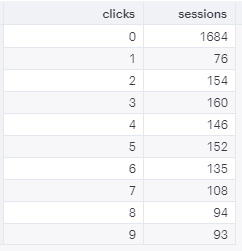

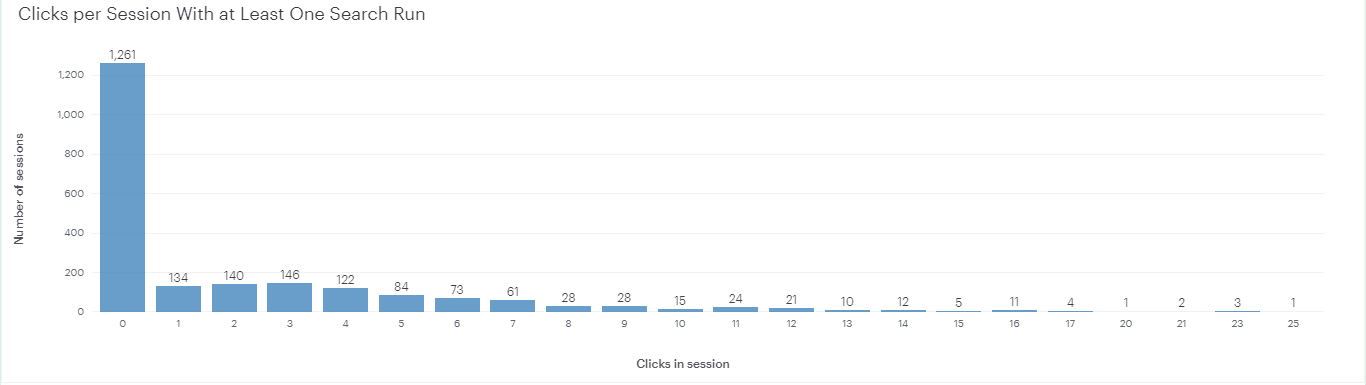

**CONCLUSION**  
Search is not performing well because in most of the searches, the users do not click on any of the results.

#### 3.4.5 Average Clicks per session by searches per session

**Objective:** To find out the average nuber of clicks in a session with different number of searches. Does the number of clicks also increase with the number of searches?

**Method:** Data is grouped on the basis of number of searches per session and then the average number of clicks per session is computed.

In [ ]:
"""SELECT runs,
       AVG(clicks)::FLOAT AS average_clicks
  FROM (
SELECT x.session_start,
       x.session,
       x.user_id,
       COUNT(CASE WHEN x.event_name = 'search_autocomplete' THEN x.user_id ELSE NULL END) AS autocompletes,
       COUNT(CASE WHEN x.event_name = 'search_run' THEN x.user_id ELSE NULL END) AS runs,
       COUNT(CASE WHEN x.event_name LIKE 'search_click_%' THEN x.user_id ELSE NULL END) AS clicks
  FROM (
SELECT e.*,
       session.session,
       session.session_start
  FROM tutorial.yammer_events e
  LEFT JOIN (
       SELECT user_id,
              session,
              MIN(occurred_at) AS session_start,
              MAX(occurred_at) AS session_end
         FROM (
              SELECT bounds.*,
              		    CASE WHEN last_event >= INTERVAL '10 MINUTE' THEN id
              		         WHEN last_event IS NULL THEN id
              		         ELSE LAG(id,1) OVER (PARTITION BY user_id ORDER BY occurred_at) END AS session
                FROM (
                     SELECT user_id,
                            event_type,
                            event_name,
                            occurred_at,
                            occurred_at - LAG(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) AS last_event,
                            LEAD(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) - occurred_at AS next_event,
                            ROW_NUMBER() OVER () AS id
                       FROM tutorial.yammer_events e
                      WHERE e.event_type = 'engagement'
                      ORDER BY user_id,occurred_at
                     ) bounds
               WHERE last_event >= INTERVAL '10 MINUTE'
                  OR next_event >= INTERVAL '10 MINUTE'
               	 OR last_event IS NULL
              	 	 OR next_event IS NULL   
              ) final
        GROUP BY 1,2
       ) session
    ON e.user_id = session.user_id
   AND e.occurred_at >= session.session_start
   AND e.occurred_at <= session.session_end
 WHERE e.event_type = 'engagement'
       ) x
 GROUP BY 1,2,3
       ) z
 WHERE runs > 0
 GROUP BY 1
 ORDER BY 1"""

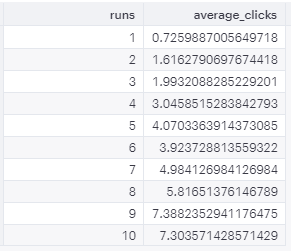

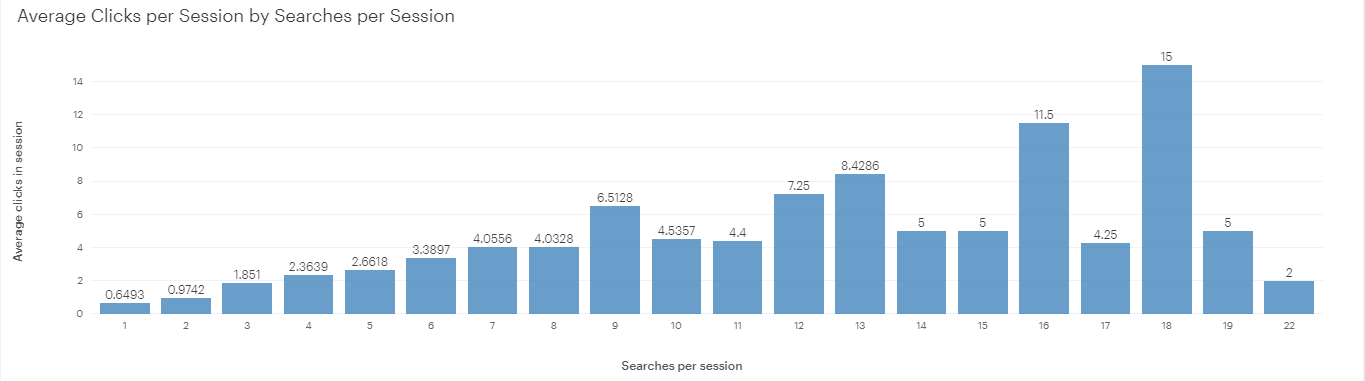

**CONCLUSION**  
More searches in a given session do not lead to many more clicks, on average.

#### 3.4.6 Number of clicks per search result (top 10 results)

**Objective:** To find out which search result among top 10 listed is most clicked by users. If the search results are efficient, then number of clicks should be skewed towards the top 2 or 3.

**Method:** The event name has a separate category for each search result. Using the count function, the number of times a particular search result is clicked is computed.

In [ ]:
"""SELECT TRIM('search_click_result_' FROM event_name)::INT AS search_result,
       COUNT(*) AS clicks
  FROM tutorial.yammer_events
 WHERE event_name LIKE 'search_click_%'
 GROUP BY 1
 ORDER BY 1"""

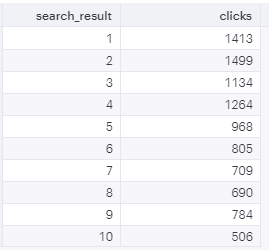

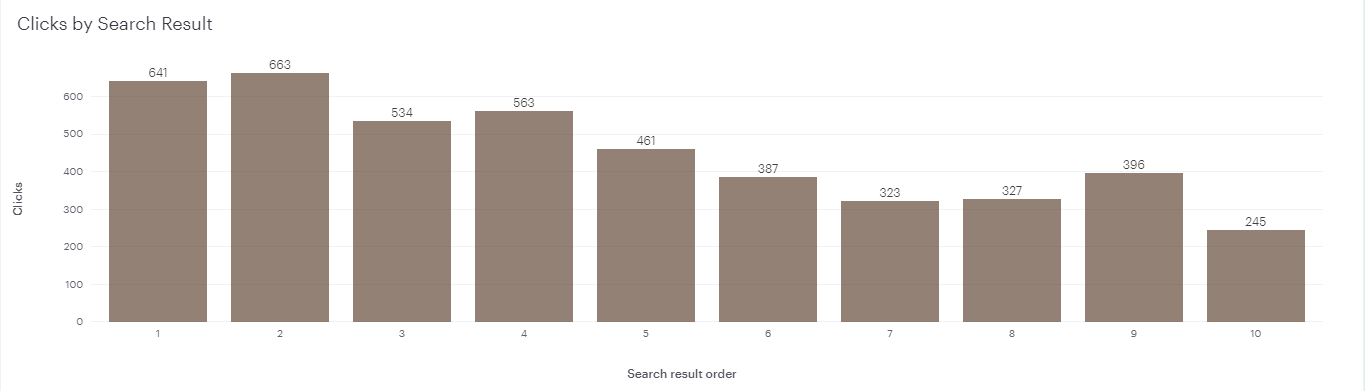

**CONCLUSION**  
Clicks are fairly evenly distributed across the result order, suggesting the ordering is not very good

#### 3.4.7 Do users use search runs and autocomplete in multiple sessions?

**Objective:** It is important whether users use search functionality only in sessions which take place in a short span of time or are they repeated users of search?

**Method:** The first search made by a user is obtained by finding the minimum of occurred_at column for each user among those users who have used search functionality. First, the first search for every user is found and data is filtered for those sessions that occur 30 days after the first session.

In [ ]:
"""SELECT searches,
       COUNT(*) AS users
  FROM (
SELECT user_id,
       COUNT(*) AS searches
  FROM (
SELECT x.session_start,
       x.session,
       x.user_id,
       x.first_search,
       COUNT(CASE WHEN x.event_name = 'search_run' THEN x.user_id ELSE NULL END) AS runs
  FROM (
SELECT e.*,
       first.first_search,
       session.session,
       session.session_start
  FROM tutorial.yammer_events e
  JOIN (
       SELECT user_id,
              MIN(occurred_at) AS first_search
         FROM tutorial.yammer_events
        WHERE event_name = 'search_run'
        GROUP BY 1
       ) first
    ON first.user_id = e.user_id
   AND first.first_search <= '2014-08-01'
  LEFT JOIN (
       SELECT user_id,
              session,
              MIN(occurred_at) AS session_start,
              MAX(occurred_at) AS session_end
         FROM (
              SELECT bounds.*,
              		    CASE WHEN last_event >= INTERVAL '10 MINUTE' THEN id
              		         WHEN last_event IS NULL THEN id
              		         ELSE LAG(id,1) OVER (PARTITION BY user_id ORDER BY occurred_at) END AS session
                FROM (
                     SELECT user_id,
                            event_type,
                            event_name,
                            occurred_at,
                            occurred_at - LAG(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) AS last_event,
                            LEAD(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) - occurred_at AS next_event,
                            ROW_NUMBER() OVER () AS id
                       FROM tutorial.yammer_events e
                      WHERE e.event_type = 'engagement'
                      ORDER BY user_id,occurred_at
                     ) bounds
               WHERE last_event >= INTERVAL '10 MINUTE'
                  OR next_event >= INTERVAL '10 MINUTE'
               	 OR last_event IS NULL
              	 	 OR next_event IS NULL   
              ) final
        GROUP BY 1,2
       ) session
    ON session.user_id = e.user_id
   AND session.session_start <= e.occurred_at
   AND session.session_end >= e.occurred_at
   AND session.session_start <= first.first_search + INTERVAL '30 DAY'
 WHERE e.event_type = 'engagement'
       ) x
 GROUP BY 1,2,3,4
       ) z
 WHERE z.runs > 0
 GROUP BY 1
       ) z
 GROUP BY 1
 ORDER BY 1
LIMIT 10"""

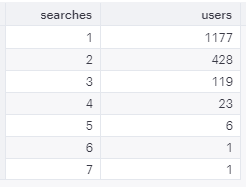

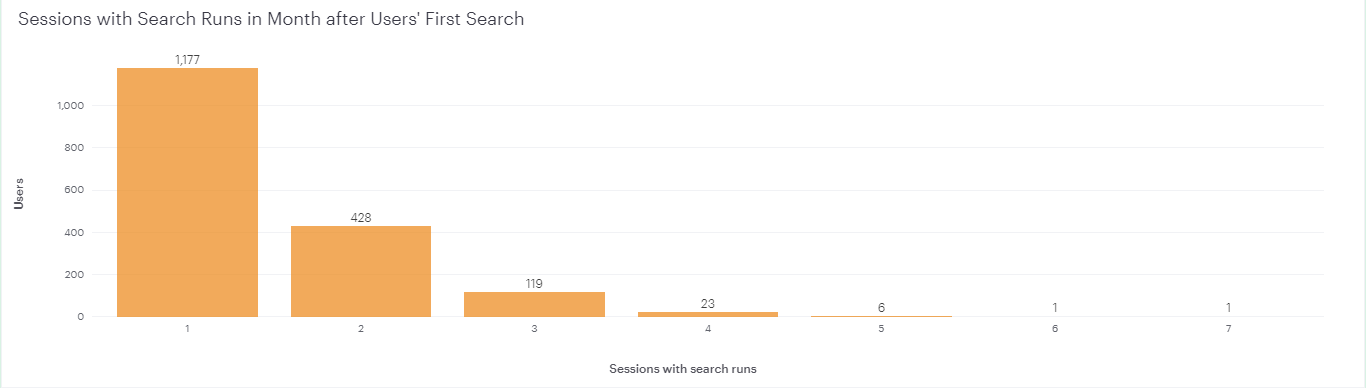

**CONCLUSION**  
 Users who run full searches rarely do so again within the following month.

In [ ]:
"""SELECT searches,
       COUNT(*) AS users
  FROM (
SELECT user_id,
       COUNT(*) AS searches
  FROM (
SELECT x.session_start,
       x.session,
       x.user_id,
       x.first_search,
       COUNT(CASE WHEN x.event_name = 'search_autocomplete' THEN x.user_id ELSE NULL END) AS autocompletes
  FROM (
SELECT e.*,
       first.first_search,
       session.session,
       session.session_start
  FROM tutorial.yammer_events e
  JOIN (
       SELECT user_id,
              MIN(occurred_at) AS first_search
         FROM tutorial.yammer_events
        WHERE event_name = 'search_autocomplete'
        GROUP BY 1
       ) first
    ON first.user_id = e.user_id
   AND first.first_search <= '2014-08-01'
  LEFT JOIN (
       SELECT user_id,
              session,
              MIN(occurred_at) AS session_start,
              MAX(occurred_at) AS session_end
         FROM (
              SELECT bounds.*,
              		    CASE WHEN last_event >= INTERVAL '10 MINUTE' THEN id
              		         WHEN last_event IS NULL THEN id
              		         ELSE LAG(id,1) OVER (PARTITION BY user_id ORDER BY occurred_at) END AS session
                FROM (
                     SELECT user_id,
                            event_type,
                            event_name,
                            occurred_at,
                            occurred_at - LAG(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) AS last_event,
                            LEAD(occurred_at,1) OVER (PARTITION BY user_id ORDER BY occurred_at) - occurred_at AS next_event,
                            ROW_NUMBER() OVER () AS id
                       FROM tutorial.yammer_events e
                      WHERE e.event_type = 'engagement'
                      ORDER BY user_id,occurred_at
                     ) bounds
               WHERE last_event >= INTERVAL '10 MINUTE'
                  OR next_event >= INTERVAL '10 MINUTE'
               	 OR last_event IS NULL
              	 	 OR next_event IS NULL   
              ) final
        GROUP BY 1,2
       ) session
    ON session.user_id = e.user_id
   AND session.session_start <= e.occurred_at
   AND session.session_end >= e.occurred_at
   AND session.session_start <= first.first_search + INTERVAL '30 DAY'
 WHERE e.event_type = 'engagement'
       ) x
 GROUP BY 1,2,3,4
       ) z
 WHERE z.autocompletes > 0
 GROUP BY 1
       ) z
 GROUP BY 1
 ORDER BY 1
LIMIT 10"""

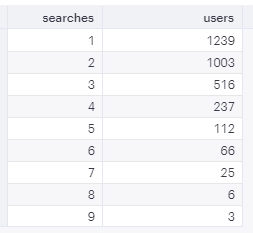

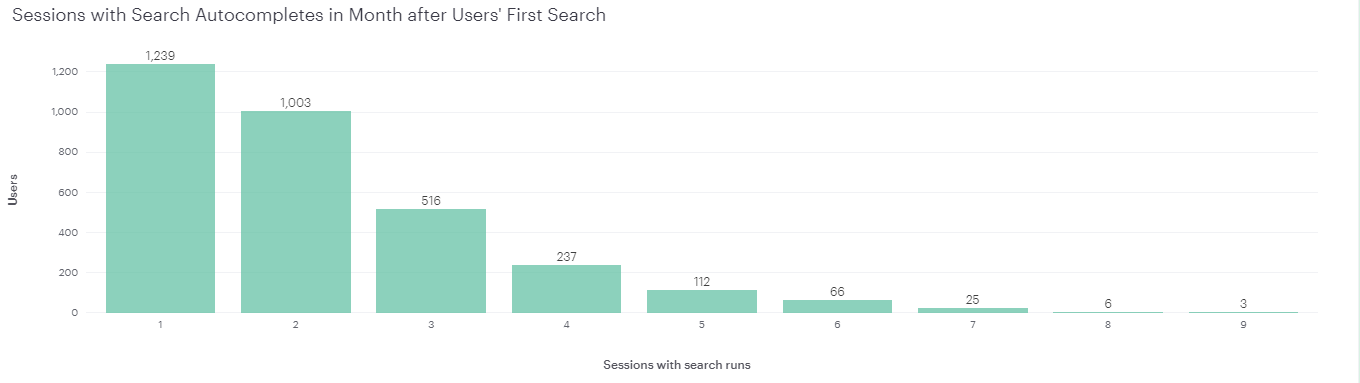

**CONCLUSION**  
Users who use the autocomplete feature, by comparison, continue to use it at a higher rate.

### 3.5 Summary <a id="3.5"></a>


* Autocomplete is used more frequently then search runs.
* Autocomplete is typically used once or twice per session.
* When users do run full searches, they typically run multiple searches in a single session.
* Search is not performing well because in most of the searches, the users do not click on any of the results.
* More searches in a given session do not lead to many more clicks, on average.
* Clicks are fairly evenly distributed across the result order, suggesting the ordering is not very good.
* Users who run full searches rarely do so again within the following month.
* Users who use the autocomplete feature, by comparison, continue to use it at a higher rate.



**Final thoughts**
* Autocomplete is performing reasonably well, while search runs are not. 
* Search results ranking should be improved as out of the top 10 results, the clicks are evenly distributed. If teh ranking was really good, the clicks to the first few results would be higher.
* The focus should be on improving full search results.